# Maize Disease classification
Deep Learning based classification of diseases in maize/corn plants

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

## Example images from each class

In [4]:
from matplotlib.image import imread
image_cat = ['Blight', 'Common Rust', 'Gray Leaf Spot', 'Healthy']

def display_images(images):
    plt.figure(figsize=(10, 5))
    
    for i, image_path in enumerate(images, 1):
        image = imread(image_path)

        plt.subplot(1, len(images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{image_cat[i-1]}")

    plt.show()

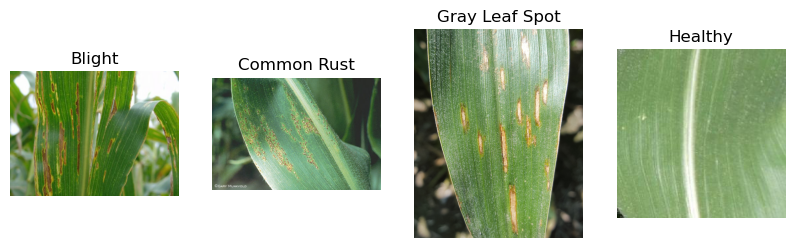

In [5]:
images = ['./data_raw/Blight/Corn_Blight (3).jpg', './data_raw/Common_Rust/Corn_Common_Rust (3).jpg', 
          './data_raw/Gray_Leaf_Spot/Corn_Gray_Spot (19).jpg', './data_raw/Healthy/Corn_Health (3).jpg']

# Display the selected images
display_images(images)

## Loading a pretrained CNN Model and Training using Transfer Learning

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3350 images belonging to 4 classes.


In [10]:
train_ds.class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [11]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './data/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 419 images belonging to 4 classes.


In [12]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(4)(vectors)

model = keras.Model(inputs, outputs)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of b0042744bf5b25fce3cb969f33bebb97 so we will re-download the data.
83683744/83683744 [==============================] - 15s 0us/step


In [13]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
105/105 [==============================] - 33s 211ms/step - loss: 0.5051 - accuracy: 0.8385 - val_loss: 0.8114 - val_accuracy: 0.8449
Epoch 2/10
105/105 [==============================] - 13s 124ms/step - loss: 0.3095 - accuracy: 0.9018 - val_loss: 0.5669 - val_accuracy: 0.8425
Epoch 3/10
105/105 [==============================] - 13s 121ms/step - loss: 0.2186 - accuracy: 0.9218 - val_loss: 0.4480 - val_accuracy: 0.8735
Epoch 4/10
105/105 [==============================] - 13s 123ms/step - loss: 0.1855 - accuracy: 0.9361 - val_loss: 0.4508 - val_accuracy: 0.8878
Epoch 5/10
105/105 [==============================] - 13s 122ms/step - loss: 0.1365 - accuracy: 0.9513 - val_loss: 0.5863 - val_accuracy: 0.8902
Epoch 6/10
105/105 [==============================] - 13s 122ms/step - loss: 0.1168 - accuracy: 0.9585 - val_loss: 0.4325 - val_accuracy: 0.9045
Epoch 7/10
105/105 [==============================] - 13s 124ms/step - loss: 0.0706 - accuracy: 0.9731 - val_loss: 0.4583 - val_ac

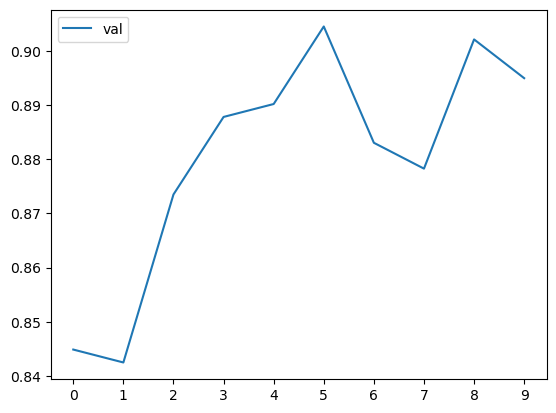

In [15]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [18]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(4)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [19]:
scores = {}

for lr in [0.0001, 0.001, 0.01]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
105/105 [==============================] - 15s 129ms/step - loss: 1.1030 - accuracy: 0.5466 - val_loss: 0.7869 - val_accuracy: 0.7375
Epoch 2/10
105/105 [==============================] - 13s 123ms/step - loss: 0.6773 - accuracy: 0.7666 - val_loss: 0.5875 - val_accuracy: 0.7971
Epoch 3/10
105/105 [==============================] - 13s 122ms/step - loss: 0.5403 - accuracy: 0.8084 - val_loss: 0.5004 - val_accuracy: 0.8305
Epoch 4/10
105/105 [==============================] - 13s 123ms/step - loss: 0.4687 - accuracy: 0.8370 - val_loss: 0.4496 - val_accuracy: 0.8425
Epoch 5/10
105/105 [==============================] - 13s 121ms/step - loss: 0.4224 - accuracy: 0.8540 - val_loss: 0.4145 - val_accuracy: 0.8544
Epoch 6/10
105/105 [==============================] - 13s 121ms/step - loss: 0.3895 - accuracy: 0.8654 - val_loss: 0.3903 - val_accuracy: 0.8663
Epoch 7/10
105/105 [==============================] - 13s 123ms/step - loss: 0.3637 - accuracy: 0.8758 - val_loss: 0.3721 -

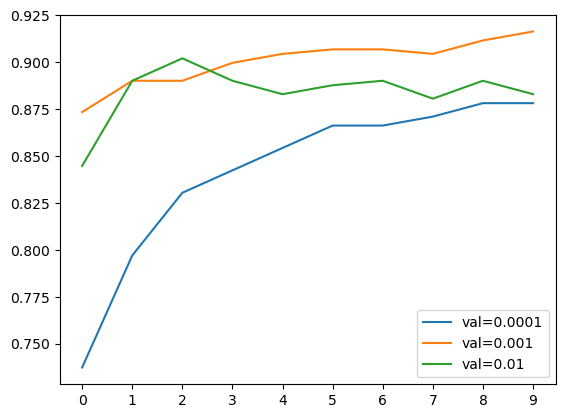

In [20]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [21]:
learning_rate = 0.001

## Checkpointing

In [22]:
model.save_weights('model_v1.h5', save_format='h5')

In [23]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [24]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
105/105 [==============================] - 16s 130ms/step - loss: 0.4789 - accuracy: 0.8191 - val_loss: 0.3227 - val_accuracy: 0.8783
Epoch 2/10
105/105 [==============================] - 13s 123ms/step - loss: 0.2805 - accuracy: 0.8949 - val_loss: 0.2836 - val_accuracy: 0.8759
Epoch 3/10
105/105 [==============================] - 13s 124ms/step - loss: 0.2418 - accuracy: 0.9110 - val_loss: 0.2795 - val_accuracy: 0.8878
Epoch 4/10
105/105 [==============================] - 13s 123ms/step - loss: 0.2033 - accuracy: 0.9260 - val_loss: 0.2559 - val_accuracy: 0.9045
Epoch 5/10
105/105 [==============================] - 13s 122ms/step - loss: 0.1901 - accuracy: 0.9325 - val_loss: 0.2651 - val_accuracy: 0.8854
Epoch 6/10
105/105 [==============================] - 13s 124ms/step - loss: 0.1657 - accuracy: 0.9430 - val_loss: 0.2507 - val_accuracy: 0.9117
Epoch 7/10
105/105 [==============================] - 13s 121ms/step - loss: 0.1584 - accuracy: 0.9403 - val_loss: 0.2630 - val_ac

## Adding more layers

In [27]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(4)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [28]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
105/105 [==============================] - 15s 126ms/step - loss: 0.5109 - accuracy: 0.8057 - val_loss: 0.3226 - val_accuracy: 0.8831
Epoch 2/10
105/105 [==============================] - 13s 121ms/step - loss: 0.2671 - accuracy: 0.9039 - val_loss: 0.2705 - val_accuracy: 0.8854
Epoch 3/10
105/105 [==============================] - 13s 124ms/step - loss: 0.2239 - accuracy: 0.9194 - val_loss: 0.2552 - val_accuracy: 0.8998
Epoch 4/10
105/105 [==============================] - 13s 123ms/step - loss: 0.1865 - accuracy: 0.9304 - val_loss: 0.2580 - val_accuracy: 0.8926
Epoch 5/10
105/105 [==============================] - 13s 123ms/step - loss: 0.1609 - accuracy: 0.9427 - val_loss: 0.2513 - val_accuracy: 0.9093
Epoch 6/10
105/105 [==============================] - 13s 125ms/step - loss: 0.1415 - accuracy: 0.9510 - val_loss: 0.2599 - val_accuracy: 0.9093
Epoch 7/10
105/105 [==============================] - 13s 123ms/step - loss: 0.1275 - accuracy: 0.9576 - val_loss: 0.2456 - val

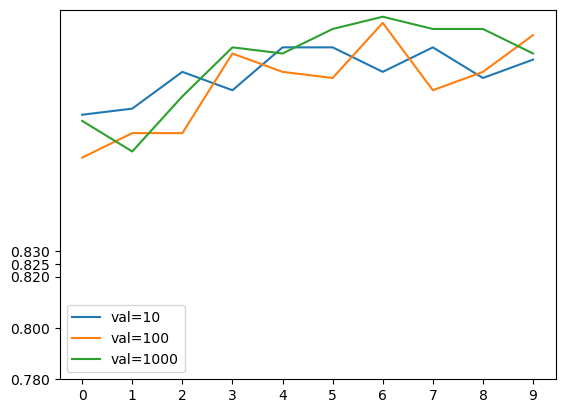

In [29]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## Regularization and dropout
* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [30]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(4)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [31]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
105/105 [==============================] - 16s 130ms/step - loss: 0.4089 - accuracy: 0.8340 - val_loss: 0.2880 - val_accuracy: 0.8663
Epoch 2/30
105/105 [==============================] - 13s 122ms/step - loss: 0.2138 - accuracy: 0.9176 - val_loss: 0.2627 - val_accuracy: 0.8854
Epoch 3/30
105/105 [==============================] - 13s 124ms/step - loss: 0.1695 - accuracy: 0.9382 - val_loss: 0.2454 - val_accuracy: 0.8998
Epoch 4/30
105/105 [==============================] - 13s 121ms/step - loss: 0.1447 - accuracy: 0.9415 - val_loss: 0.2684 - val_accuracy: 0.9045
Epoch 5/30
105/105 [==============================] - 13s 121ms/step - loss: 0.1019 - accuracy: 0.9669 - val_loss: 0.2542 - val_accuracy: 0.9069
Epoch 6/30
105/105 [==============================] - 13s 123ms/step - loss: 0.0783 - accuracy: 0.9734 - val_loss: 0.2580 - val_accuracy: 0.9093
Epoch 7/30
105/105 [==============================] - 13s 122ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.2723 - va

105/105 [==============================] - 13s 122ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.3928 - val_accuracy: 0.9165
Epoch 28/30
105/105 [==============================] - 13s 126ms/step - loss: 0.0127 - accuracy: 0.9970 - val_loss: 0.4456 - val_accuracy: 0.9165
Epoch 29/30
105/105 [==============================] - 13s 123ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.4351 - val_accuracy: 0.9212
Epoch 30/30
105/105 [==============================] - 13s 126ms/step - loss: 0.0177 - accuracy: 0.9961 - val_loss: 0.5778 - val_accuracy: 0.9045


0.5
Epoch 1/30
105/105 [==============================] - 16s 132ms/step - loss: 0.5023 - accuracy: 0.8015 - val_loss: 0.2948 - val_accuracy: 0.8759
Epoch 2/30
105/105 [==============================] - 13s 126ms/step - loss: 0.3108 - accuracy: 0.8728 - val_loss: 0.2601 - val_accuracy: 0.8878
Epoch 3/30
105/105 [==============================] - 13s 125ms/step - loss: 0.2677 - accuracy: 0.8913 - val_loss: 0.2563 - val_accu

105/105 [==============================] - 13s 128ms/step - loss: 0.2582 - accuracy: 0.8878 - val_loss: 0.2324 - val_accuracy: 0.9117
Epoch 24/30
105/105 [==============================] - 13s 126ms/step - loss: 0.2682 - accuracy: 0.8794 - val_loss: 0.2305 - val_accuracy: 0.9141
Epoch 25/30
105/105 [==============================] - 13s 128ms/step - loss: 0.2505 - accuracy: 0.8913 - val_loss: 0.2318 - val_accuracy: 0.9165
Epoch 26/30
105/105 [==============================] - 13s 126ms/step - loss: 0.2396 - accuracy: 0.8946 - val_loss: 0.2272 - val_accuracy: 0.9045
Epoch 27/30
105/105 [==============================] - 13s 125ms/step - loss: 0.2404 - accuracy: 0.8881 - val_loss: 0.2267 - val_accuracy: 0.9117
Epoch 28/30
105/105 [==============================] - 13s 125ms/step - loss: 0.2408 - accuracy: 0.8946 - val_loss: 0.2378 - val_accuracy: 0.9141
Epoch 29/30
105/105 [==============================] - 13s 125ms/step - loss: 0.2324 - accuracy: 0.8991 - val_loss: 0.2421 - val_accurac

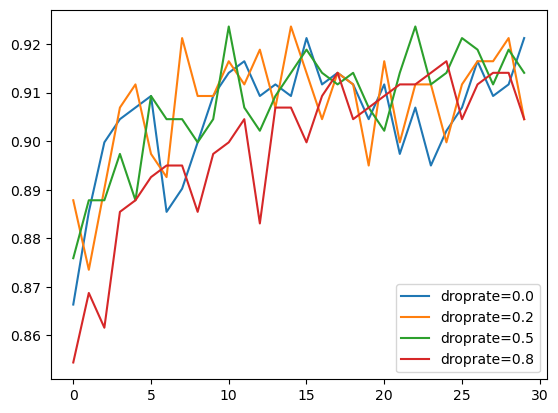

In [33]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('droprate=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

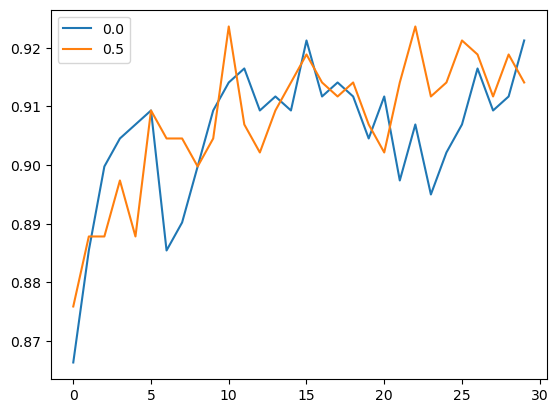

In [38]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation
* Different data augmentations
* Training a model with augmentations

In [39]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './data/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3350 images belonging to 4 classes.
Found 419 images belonging to 4 classes.


In [40]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
105/105 [==============================] - 15s 128ms/step - loss: 0.5024 - accuracy: 0.7979 - val_loss: 0.2792 - val_accuracy: 0.8783
Epoch 2/50
105/105 [==============================] - 13s 120ms/step - loss: 0.3313 - accuracy: 0.8654 - val_loss: 0.2674 - val_accuracy: 0.8902
Epoch 3/50
105/105 [==============================] - 13s 125ms/step - loss: 0.2785 - accuracy: 0.8875 - val_loss: 0.2486 - val_accuracy: 0.8974
Epoch 4/50
105/105 [==============================] - 13s 122ms/step - loss: 0.2546 - accuracy: 0.8988 - val_loss: 0.2481 - val_accuracy: 0.8998
Epoch 5/50
105/105 [==============================] - 13s 121ms/step - loss: 0.2250 - accuracy: 0.9122 - val_loss: 0.2335 - val_accuracy: 0.9093
Epoch 6/50
105/105 [==============================] - 13s 124ms/step - loss: 0.2087 - accuracy: 0.9173 - val_loss: 0.2202 - val_accuracy: 0.9045
Epoch 7/50
105/105 [==============================] - 13s 123ms/step - loss: 0.2017 - accuracy: 0.9176 - val_loss: 0.2270 - val_ac

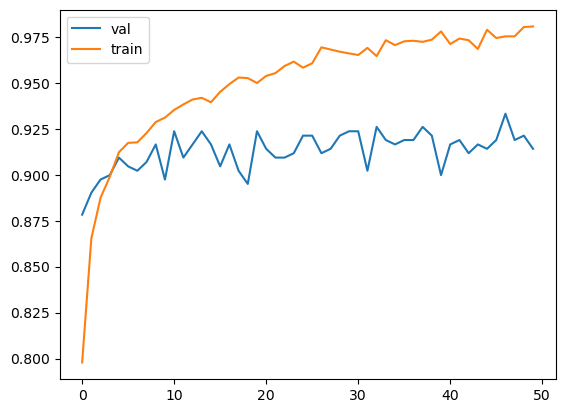

In [41]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training a larger model
* Train a 256x256 model

In [44]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(4)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [45]:
input_size = 256

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './data/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3350 images belonging to 4 classes.
Found 419 images belonging to 4 classes.


In [47]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [48]:
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
105/105 [==============================] - 50s 442ms/step - loss: 0.4840 - accuracy: 0.8060 - val_loss: 0.2898 - val_accuracy: 0.8831
Epoch 2/50
105/105 [==============================] - 45s 422ms/step - loss: 0.3069 - accuracy: 0.8728 - val_loss: 0.2532 - val_accuracy: 0.8902
Epoch 3/50
105/105 [==============================] - 45s 428ms/step - loss: 0.2686 - accuracy: 0.8934 - val_loss: 0.2254 - val_accuracy: 0.9045
Epoch 4/50
105/105 [==============================] - 45s 426ms/step - loss: 0.2383 - accuracy: 0.9033 - val_loss: 0.2345 - val_accuracy: 0.9093
Epoch 5/50
105/105 [==============================] - 45s 424ms/step - loss: 0.2235 - accuracy: 0.9116 - val_loss: 0.2172 - val_accuracy: 0.9021
Epoch 6/50
105/105 [==============================] - 45s 425ms/step - loss: 0.2069 - accuracy: 0.9173 - val_loss: 0.2002 - val_accuracy: 0.9141
Epoch 7/50
105/105 [==============================] - 45s 423ms/step - loss: 0.2048 - accuracy: 0.9188 - val_loss: 0.2088 - val_ac

## Using the model
* Loading the model
* Evaluating the model
* Getting predictions

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [52]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(256, 256),
    batch_size=32,
    shuffle=False
)

Found 419 images belonging to 4 classes.


In [53]:
model = keras.models.load_model('xception_v4_1_34_0.947.h5')

In [54]:
model.evaluate(test_ds)

14/14 [==============================] - 5s 262ms/step - loss: 0.1427 - accuracy: 0.9403


[0.14270265400409698, 0.940334141254425]

In [55]:
path = './data/test/Healthy/Corn_Health (45).jpg'

In [56]:
img = load_img(path, target_size=(256, 256))

In [57]:
import numpy as np

In [58]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 256, 256, 3)

In [59]:
X = preprocess_input(X)

In [60]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [61]:
classes = ['Blight', 'Common Rust', 'Gray Leaf Spot', 'Healthy']

In [62]:
dict(zip(classes, pred[0]))

{'Blight': -2.2785518,
 'Common Rust': -4.186551,
 'Gray Leaf Spot': -4.602578,
 'Healthy': 5.5006685}